
# Project: Investigate a Dataset of TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDB movies dataset has around more 10000 movies across different years, each movie has a set of data to use to come up with some insights. Such findings would give an overview and answers to the questions on many levels like monetary level, genre level, actor & director level, etc.

In [12]:
#import statements for all of the packages that you

import numpy as np
import pandas as pd
import os, fnmatch
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [13]:
#Reading and Loading the data
df=pd.read_csv("tmdb-movies.csv")
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1721,19458,tt1196339,0.294343,0,0,Princess Protection Program,Selena Gomez|Demi Lovato|Jamie Chung|Nicholas ...,http://disneychannel.disney.com/princess-prote...,Allison Liddi-Brown,Royality meets reality.,...,When Princess Rosalinda is about to become que...,89,Comedy|Drama|Family,Disney Channel,6/18/09,188,6.1,2009,0.000000e+00,0.000000e+00
4667,101176,tt1612782,0.322007,0,1081,The Butterfly Room,Barbara Steele|Julia Putnam|Ellery Sprayberry|...,NaN,Jonathan Zarantonello,Kids should never grow up,...,"Ann, a reclusive elegant lady, with an obsessi...",87,Horror|Thriller,Rai Cinema|Achab Film|Wiseacre Films|Emergency...,8/4/12,24,5.7,2012,0.000000e+00,1.026674e+03
10243,9024,tt0106941,0.892862,30000000,11146270,For Love or Money,Michael J. Fox|Gabrielle Anwar|Anthony Higgins...,NaN,Barry Sonnenfeld,He thought there was nothing as seductive as m...,...,New York concierge Doug Ireland wants to go in...,94,Comedy|Romance,Universal Studios|Imagine Entertainment,10/1/93,35,5.4,1993,4.528410e+07,1.682496e+07
4524,113947,tt1866249,0.591005,1000000,9138338,The Sessions,John Hawkes|Helen Hunt|William H. Macy|Moon Bl...,NaN,Ben Lewin,The festival hit of the year!,...,Though a childhood bout with polio left him de...,98,Drama|Romance|Comedy,Rhino Films|Such Much Films,5/2/12,102,6.3,2012,9.497443e+05,8.679084e+06
4299,11310,tt0109439,0.302754,0,0,City Slickers II: The Legend of Curly's Gold,Billy Crystal|Daniel Stern|Jon Lovitz|Jack Pal...,NaN,Paul Weiland,NaN,...,On Mitch Robbins 40th birthday begins quite we...,116,Action|Comedy|Drama|Western,Columbia Pictures|Castle Rock Entertainment,6/10/94,51,5.0,1994,0.000000e+00,0.000000e+00


In [14]:
#discovering the data structure
df.shape

(10866, 21)

In [15]:
#dicovering the data columns, its dtypes and their nulls if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [16]:
#a brief of statistics to help us have an overview of the data and spot the errors of any
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [17]:
#figuring out if the data has any duplicates
df.duplicated().sum()

1

In [104]:
#columns which have null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [18]:
#figuring out the movies that have budget and revenus less than 6000 and 1000 respectively besides the movies of zero budget 
df.query('budget < 6000' or df.query('revenue < 1000' or df.query('budget = 0')))

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


### Data Cleaning

In [19]:
#Taking a copy from the original data to start cleaning it
df_clean = df.copy()

#### Define
Removing the duplicate rows

#### Code

In [20]:
df_clean.drop_duplicates(inplace=True)

#### Test

In [21]:
df_clean.duplicated().sum()

0

#### Define
Converting Id column to string and release year column to a category

#### Code

In [22]:
df_clean['id'] = df_clean['id'].astype(str)
df_clean['release_year'] = df_clean['release_year'].astype('category')

#### Test

In [23]:
df_clean[['id', 'release_year']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 2 columns):
id              10865 non-null object
release_year    10865 non-null category
dtypes: category(1), object(1)
memory usage: 183.3+ KB


#### Define
Converting release date to datetime 

#### Code

In [24]:
df_clean ['release_date'] = pd.to_datetime(df_clean['release_date'])

#### Test

In [25]:
df_clean['release_date'].dtype

dtype('<M8[ns]')

#### Define
Drop unneeded columns of text content

#### Code

In [26]:
df_clean.drop(['homepage', 'imdb_id', 'tagline','overview', 'keywords'], axis=1, inplace=True)

#### Test

In [27]:
list(df_clean)

['id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'director',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [28]:
df_clean.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [29]:
#Taking a copy from the cleaned data to start more cleaning to be ready for another set of analysis
df_clean_figures = df_clean.copy()

#### Define
Remving all the null data which does exist in cast, director, genres and production companies columns

#### Code

In [30]:
df_clean_figures = df_clean_figures[~(df_clean_figures.production_companies.isnull())]

In [31]:
df_clean_figures = df_clean_figures[~(df_clean_figures.director.isnull())]

In [32]:
df_clean_figures = df_clean_figures[~(df_clean_figures.genres.isnull())]

In [33]:
df_clean_figures = df_clean_figures[~(df_clean_figures.cast.isnull())]

#### Test

In [34]:
df_clean_figures.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Define
Removing all the movies of 0 budget, revenue, runtime in addition to movies with budget less 6000 and revenue less than 1000

#### Code

In [35]:
df_clean_figures = df_clean_figures[df_clean_figures['budget']!=0]

In [36]:
df_clean_figures = df_clean_figures[df_clean_figures['revenue']!=0]

In [37]:
df_clean_figures = df_clean_figures[df_clean_figures['runtime']!=0]

In [38]:
df_clean_figures =df_clean_figures[df_clean_figures['budget'] > 6000]

In [39]:
df_clean_figures =df_clean_figures[df_clean_figures['revenue'] > 1000]

#### Test

In [40]:
df_clean_figures.query('budget < 6000' or df_clean_figures.query('revenue < 1000' or df_clean_figures.query('budget = 0')))

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### Define
Editing this movie budget as it has an extra zero

#### Code

In [41]:
df_clean_figures.at[2244, 'budget'] = 42500000
df_clean_figures.at[2244, 'budget_adj'] = 42500000

#### Test

In [42]:
df_clean_figures.loc[2244]

id                                                                  46528
popularity                                                        0.25054
budget                                                           42500000
revenue                                                          11087569
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_count                                                             74
vote_average                                                          6.4
release_year                          

#### Define
Extracting the profit columns from the subtracting the revenue and the budget columns

#### Code

In [43]:
df_clean_figures['profit']= df_clean_figures['revenue'] - df_clean_figures['budget']

In [44]:
df_clean_figures['profit_adj']= df_clean_figures['revenue_adj'] - df_clean_figures['budget_adj']

#### Test

In [45]:
df_clean_figures['profit']

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
5         397950503
6         285603537
7         487380321
8        1082730962
9         678708609
10        635674609
11          7987720
12         21869414
13        155637091
14       1125035767
15        111760117
16        277771424
17        388602163
18        447351353
19        490523427
20         19035668
21         61709827
22        360490832
23        529651467
24        105346506
25        532330139
26        147863606
27        322802136
28         68346473
29        250256926
            ...    
10689     130195658
10690     155014286
10691      97721910
10692      24350000
10716      -8000000
10724      74974493
10725      96308889
10727      41185053
10728      -5605446
10755     175813770
10756     167884007
10757      54350000
10758     245218018
10759      69700000
10760     138300000
10762      35000000
10770      32700000
10771      26471420
10775       6640084


In [46]:
df_clean_figures['profit_adj']

0        1.254446e+09
1        2.101614e+08
2        1.704191e+08
3        1.718723e+09
4        1.210949e+09
5        3.661143e+08
6        2.627551e+08
7        4.483897e+08
8        9.961120e+08
9        6.244116e+08
10       5.848204e+08
11       7.348699e+06
12       2.011985e+07
13       1.431861e+08
14       1.035032e+09
15       1.028193e+08
16       2.555496e+08
17       3.575138e+08
18       4.115631e+08
19       4.512814e+08
20       1.751281e+07
21       5.677302e+07
22       3.316514e+08
23       4.872791e+08
24       9.691874e+07
25       4.897435e+08
26       1.360345e+08
27       2.969778e+08
28       6.287873e+07
29       2.302363e+08
             ...     
10689    9.010273e+08
10690    1.072786e+09
10691    6.762907e+08
10692    1.685157e+08
10716   -5.536451e+07
10724    4.456682e+08
10725    5.724855e+08
10727    2.448148e+08
10728   -3.332025e+07
10755    5.876928e+08
10756    5.611860e+08
10757    1.816758e+08
10758    8.196904e+08
10759    2.329862e+08
10760    4

In [47]:
df_clean_figures.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09


## Store

### Store the final datasets after cleaning them according to the needs of the project.

#### Code

In [48]:
df_clean.to_csv('tmdb-movies-clean.csv', index=False)

In [49]:
df_clean_figures.to_csv('tmdb-movies-clean-figures.csv', index=False)

#### Test

In [50]:
fnmatch.filter(os.listdir('.'), '*.csv')

['tmdb-movies.csv', 'tmdb-movies-clean.csv', 'tmdb-movies-clean-figures.csv']

<a id='eda'></a>
## Exploratory Data Analysis


###df_clean dataset analysis

#### Q1: What is the distribution of the movies over the years of the dataset?

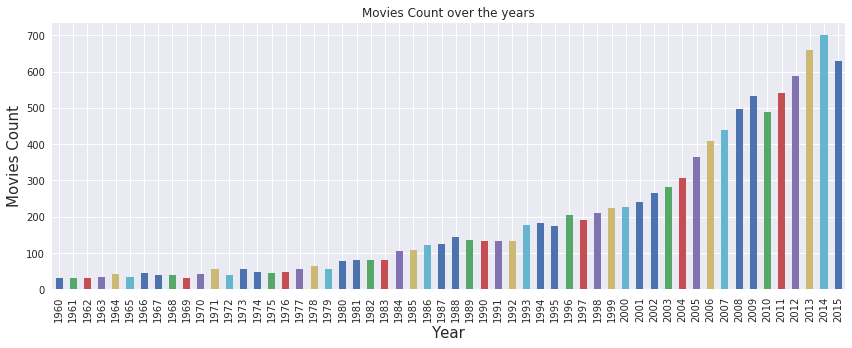

In [51]:
#Movies distribution over the years of the dataset
fig, (ax1) = plt.subplots(1, figsize=(12,5))
df_clean.groupby('release_year')['original_title'].count().plot(kind='bar', ax=ax1, title='Movies Count over the years')
ax1.set_xlabel('Year', size=15)
ax1.set_ylabel('Movies Count', size=15)
plt.tight_layout();

### Feedback
#### It seeems that the movies number increases with years obviously. In addition, the number of movies over the first three decdes nearly belowe 100 movies a year since the sixties till the beginning of eighties. Besides, the number exceed the 100 ones starting from the mid eithties and took less time to reach the double in the late ninties. Then, it increased clearly since 2000s untill it increased dramatically from 2005 to 2015. 

### Q2: Which are the months that have the highest numbers of movies released over the year?

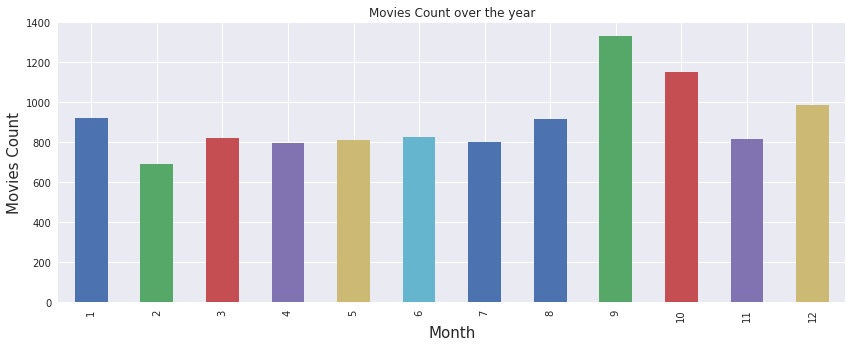

In [52]:
#Movies distribution over the months of the years
fig, (ax1) = plt.subplots(1, figsize=(12,5))
h= df_clean['release_date'].dt.month 
df_clean.groupby(h)['original_title'].count().plot(kind='bar', ax=ax1, title='Movies Count over the year')
ax1.set_xlabel('Month', size=15)
ax1.set_ylabel('Movies Count', size=15)
plt.tight_layout();

### Feedback
#### The data demonstrates a fluctuation regarding the number of released movies over the year, however, September, October, December and January showcase that they witnessed a high number of released movies. Consequently, these months might be a season to release the movies.

### Q3: What does the populairty seem in comparison with both vote average and count?

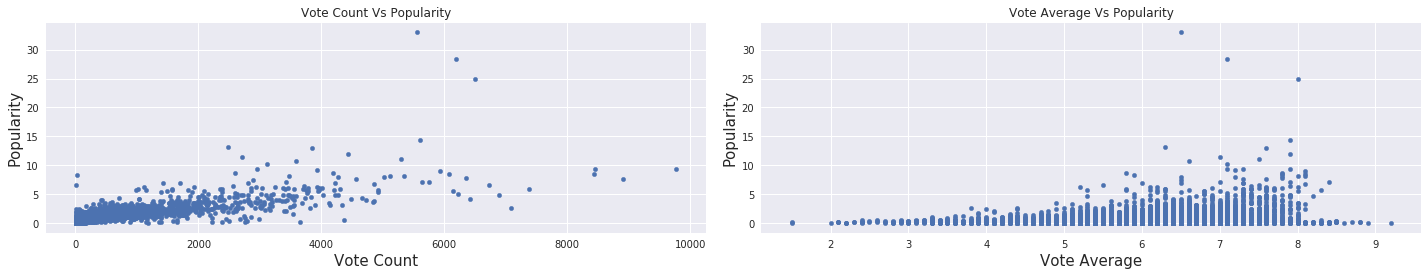

In [53]:
#popularity vs vote count and vote average
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,4))
df_clean.plot(x='vote_count',y='popularity', kind='scatter', ax=ax1, title= 'Vote Count Vs Popularity')
ax1.set_xlabel('Vote Count', size=15)
ax1.set_ylabel('Popularity', size=15)

df_clean.plot(x='vote_average',y='popularity', kind='scatter', ax=ax2, title="Vote Average Vs Popularity")
ax2.set_xlabel('Vote Average', size=15)
ax2.set_ylabel('Popularity', size=15)

plt.tight_layout();

### Feedback
#### A popularity metric is calculated based on a set of factors such as votes, views, being in favorite, watchlist, etc based on the TMDB website. According to the left chart, the votes seem to contribute to the popularity of the movie slightly no matter how large the count is. Besides, the movies with an average score between 6 and 8 are more popular than the rest. Over and above, the majority of movies have less than 10 in popularity. So, it means that the highest values could be outliers.

### Q4: In which year do its movies have the highest votes?

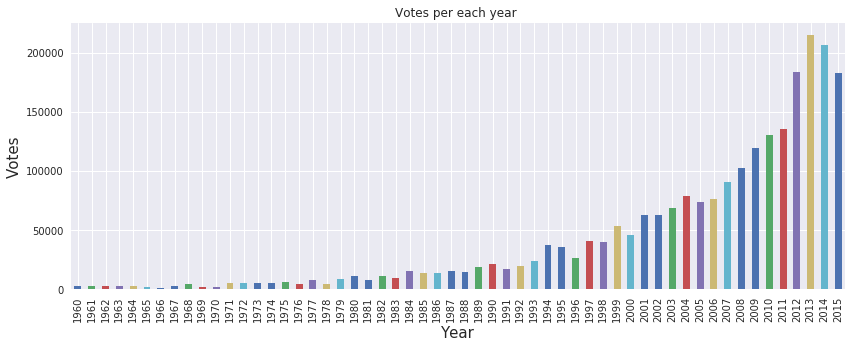

In [54]:
#which year, its movies have the most vote counts
fig, (ax1) = plt.subplots(1, figsize=(12,5))
df_clean.groupby('release_year')['vote_count'].sum().plot(kind='bar', ax=ax1, title='Votes per each year ')
ax1.set_xlabel('Year', size=15)
ax1.set_ylabel('Votes', size=15)
plt.tight_layout();

### Feedback
#### It seems that the movies' fans are more fond of the recent movies other than the older ones to give such big amount of votes to the last years' movies and it turns out from other side that the recent movies are more seen than the older ones. 

### Q5: In which year do its movies have the highest vote average?

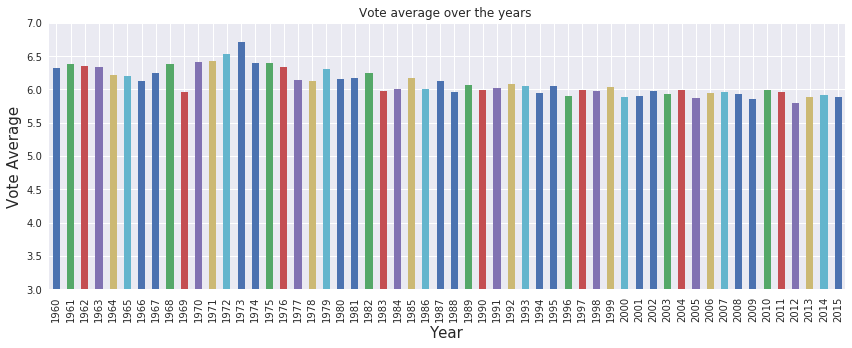

In [55]:
#which year, its movies have the most highest vote average
fig, (ax1) = plt.subplots(1, figsize=(12,5))
df_clean.groupby('release_year')['vote_average'].mean().plot(kind='bar', ylim=(3,7), ax=ax1, title='Vote average over the years ')
ax1.set_xlabel('Year', size=15)
ax1.set_ylabel('Vote Average', size=15)
plt.tight_layout();

### Feedback
#### In contract with the previous chart, the older movies got higher scoring average than the recent ones and it could be in this way as there are less amount of votes. But, it doesn't overlook how much good such old movies.

### Q6: Do the movies with the highest votes having the highest vote average and vice versa?

In [56]:
#the highest vote counts
df_clean[['original_title', 'vote_count', 'vote_average']].sort_values(ascending=False, by = 'vote_count').iloc[:10,0:]

,original_title,vote_count,vote_average
1919,Inception,9767,7.9
4361,The Avengers,8903,7.3
1386,Avatar,8458,7.1
2875,The Dark Knight,8432,8.1
4364,Django Unchained,7375,7.7
4382,The Hunger Games,7080,6.7
5425,Iron Man 3,6882,6.9
4363,The Dark Knight Rises,6723,7.5
629,Interstellar,6498,8.0
4367,The Hobbit: An Unexpected Journey,6417,6.9


In [57]:
#the highest vote average
df_clean[['original_title', 'vote_count', 'vote_average']].sort_values(ascending=False, by = 'vote_average').iloc[:10,0:]

,original_title,vote_count,vote_average
3894,The Story of Film: An Odyssey,14,9.2
538,The Mask You Live In,11,8.9
1200,Black Mirror: White Christmas,41,8.8
2269,Life Cycles,27,8.8
6911,Pink Floyd: Pulse,23,8.7
2401,Opeth: In Live Concert At The Royal Albert Hall,10,8.6
3690,The Art of Flight,60,8.5
8411,Queen - Rock Montreal,14,8.5
8221,A Personal Journey with Martin Scorsese Throug...,11,8.5
8839,Dave Chappelle: Killin' Them Softly,17,8.5


### Feedback
#### Movies with the highest vote average have very low vote counts, unlike the movies with the highest vote counts which have a fine score average. So, the vote average of the movies with the highest vote counts is more than authentic due to such a significant amount of votes which may give an indication of how such movies really look like to the movies' fans. 

## Q7: Does the highest vote average mean high vote count?

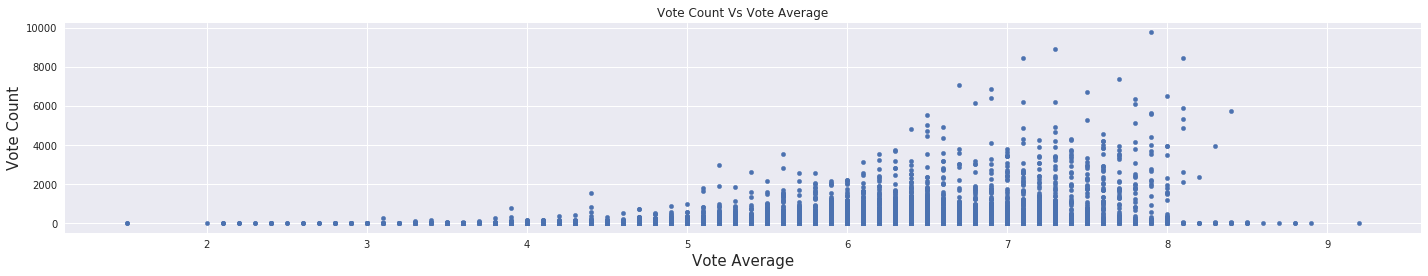

In [58]:
fig, (ax1) = plt.subplots(1, figsize=(20,4))
df_clean.plot(x='vote_average',y='vote_count', kind='scatter', ax=ax1, title= 'Vote Count Vs Vote Average')
ax1.set_xlabel('Vote Average', size=15)
ax1.set_ylabel('Vote Count', size=15)


plt.tight_layout();

### Feedback
#### The movies' average vote increases with the vote counts as there is a gradual increase starting from average score 5 until we reach average score 8. While the movies with average score more than 8 have low amount of votes.

## Q8: Did the movies runtime change over the years?

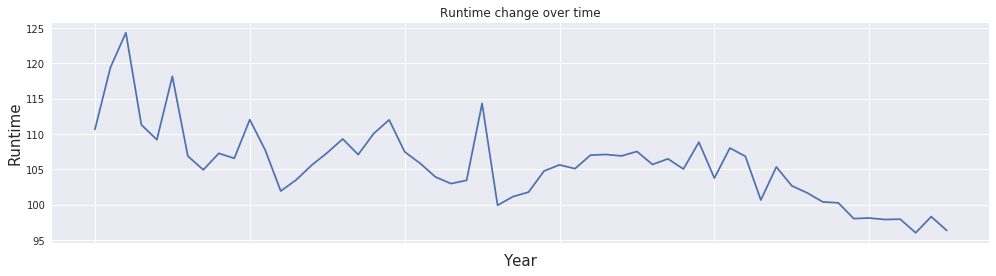

In [87]:
fig, (ax1) = plt.subplots(1, figsize=(14,4))

df_clean.groupby('release_year')['runtime'].mean().plot(kind='line', ax=ax1, title="Runtime change over time")
ax1.set_xlabel('Year', size=15)
ax1.set_ylabel('Runtime', size=15)

plt.setp(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

### Feedback
#### It seems the movies' runtime really decreases with years and it might be due to the obvious emergence of the various kinds of movies recently such as documentary, short movies, etc which has less runtime.  

## Q9: Who has directed the highest number of movies?

In [395]:
df_clean['director'].value_counts().iloc[:10, ]

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64

## Q10: What are the most popular movies?

In [458]:
df_clean[['original_title', 'popularity', 'release_year']].sort_values(ascending = False, by = 'popularity').iloc[:10,]

,original_title,popularity,release_year
0,Jurassic World,32.985763,2015
1,Mad Max: Fury Road,28.419936,2015
629,Interstellar,24.949134,2014
630,Guardians of the Galaxy,14.311205,2014
2,Insurgent,13.112507,2015
631,Captain America: The Winter Soldier,12.971027,2014
1329,Star Wars,12.037933,1977
632,John Wick,11.422751,2014
3,Star Wars: The Force Awakens,11.173104,2015
633,The Hunger Games: Mockingjay - Part 1,10.739009,2014


## df_genres dataset analysis

## Q1: What are the most popular genres across the dataset?

In [365]:
#copying from df_clean to split the genres to find the movies' genres over the years
#Approach to follow from https://programmer.ink/think/pandas-how-do-i-split-text-in-a-column-into-multiple-lines-python.html
df_genres = df_clean.copy()

In [366]:
df_genres = df_genres['genres'].str.split('|', expand=True).stack()

In [367]:
df_genres = df_genres.reset_index(level=0, drop=True)

In [369]:
df_genres = df_genres.rename('genres')

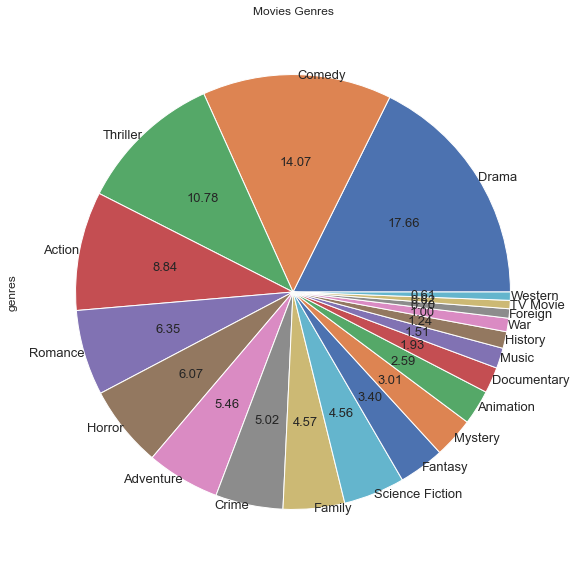

In [370]:
df_genres.value_counts().plot(kind= 'pie', autopct='%.2f', fontsize=13, figsize=(10, 10),
                                                 title="Movies Genres",labeldistance=1);

### Feedback
#### Drama comes first as a genre, for the movies included in the dataset, then comedy and third comes thriller. These three genres only make  40% of the total genres found in the dataset.

## df_cast dataset analysis


## Q1: Who has participated the most in the movies across the dataset?


In [371]:
#copying from df_clean to split the cast to find most participating actor in these movies
df_cast = df_clean.copy()

In [372]:
df_cast = df_cast['cast'].str.split('|', expand=True).stack()

In [373]:
df_cast = df_cast.reset_index(level=0, drop=True)

In [374]:
df_cast = df_cast.rename('cast')

In [377]:
df_cast.value_counts().iloc[:10, ]

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Liam Neeson          48
Name: cast, dtype: int64

## df_production dataset analysis

## Q1: Which companies produced the highest number of movies?

In [381]:
#copying from df_clean to split the cast to find most participating actor in these movies
df_production = df_clean.copy()

In [383]:
df_production = df_production['production_companies'].str.split('|', expand=True).stack()

In [384]:
df_production = df_production.reset_index(level=0, drop=True)

In [385]:
df_production = df_production.rename('production_companies')

In [390]:
df_production.value_counts().iloc[:10, ]

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
Name: production_companies, dtype: int64

## df_clean_figures dataset analysis

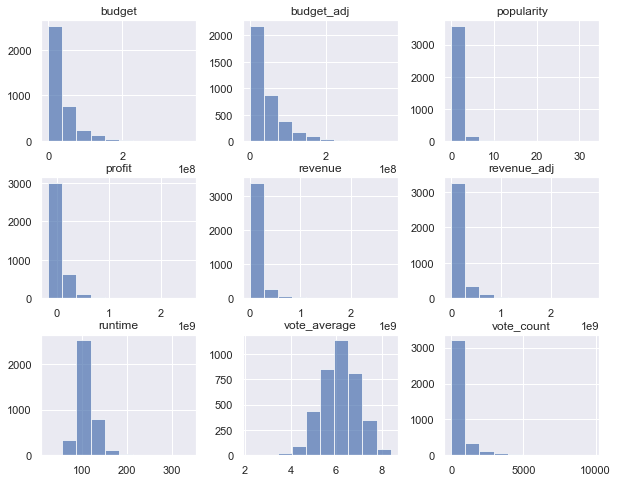

In [140]:
#A glimpse how the data distribution seem:
df_clean_figures.hist(figsize = (10,8), alpha=0.7);

In [142]:
df_clean_figures.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


### Q1: What are the biggest money-losing and most profitable movies?

In [461]:
df_clean_figures[['original_title', 'profit','profit_adj', 'release_year']].sort_values(ascending=False, by='profit').iloc[:10,:]

,original_title,profit,profit_adj,release_year
1386,Avatar,2544505847,2.586237e+09,2009
3,Star Wars: The Force Awakens,1868178225,1.718723e+09,2015
5231,Titanic,1645034188,2.234714e+09,1997
0,Jurassic World,1363528810,1.254446e+09,2015
4,Furious 7,1316249360,1.210949e+09,2015
4361,The Avengers,1299557910,1.234248e+09,2012
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822,1.166009e+09,2011
14,Avengers: Age of Ultron,1125035767,1.035032e+09,2015
5422,Frozen,1124219009,1.052306e+09,2013
8094,The Net,1084279658,1.551568e+09,1995


In [463]:
df_clean_figures[['original_title', 'profit','profit_adj', 'release_year']].sort_values(ascending=True, by='profit').iloc[:10,:]

,original_title,profit,profit_adj,release_year
5508,The Lone Ranger,-165710090,-1.551102e+08,2013
7031,The Alamo,-119180039,-1.375868e+08,2004
3484,Mars Needs Moms,-111007242,-1.076102e+08,2011
2435,The 13th Warrior,-98301101,-1.286813e+08,1999
4078,The Adventures of Pluto Nash,-92896027,-1.126143e+08,2002
6590,Flushed Away,-84540684,-9.144505e+07,2006
2915,Australia,-80445998,-8.147463e+07,2008
8102,Cutthroat Island,-79482678,-1.137371e+08,1995
8765,Supernova,-75171919,-9.518961e+07,2000
6309,A Sound of Thunder,-74010360,-8.263725e+07,2005


### Q2: Does the inflation have that remarkable impact on movies profit over the years?

C:\Users\Ahmed Nasser\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


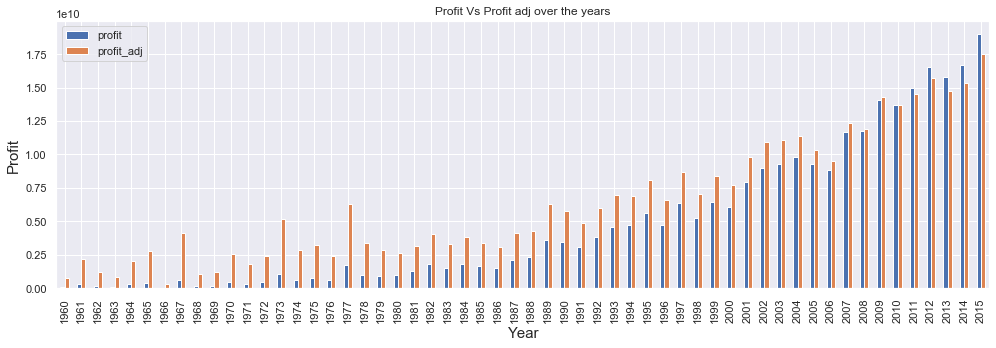

In [173]:
fig, (ax1) = plt.subplots(1, figsize=(14,5))
df_clean_figures.groupby('release_year')['profit', 'profit_adj'].sum().plot(kind='bar', ax=ax1, title='Profit Vs Profit adj over the years')
ax1.set_xlabel('Year', size=15)
ax1.set_ylabel('Profit', size=15)

plt.tight_layout();

### Feedback
#### As expected that the older movies' profit seem to be good in terms of 2010 dollars besides elucidating really remarkable profit across the seventies.

## Q3: How would the budgets, revenues and profits change over the years?

C:\Users\Ahmed Nasser\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


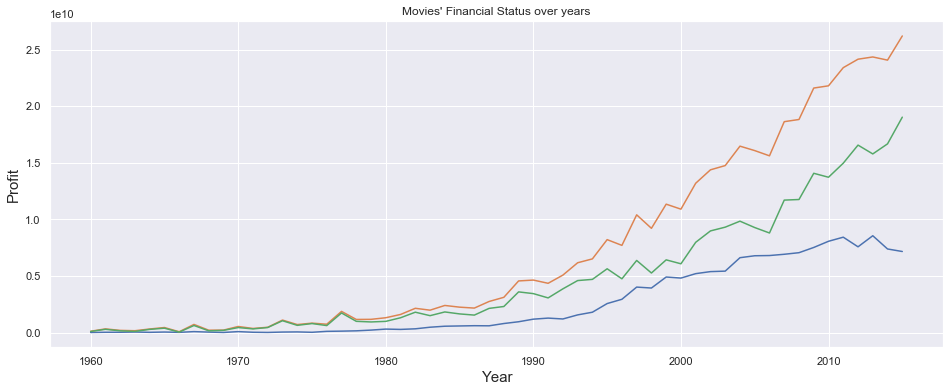

In [234]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))

monetary = df_clean_figures.groupby('release_year')['budget','revenue','profit'].sum()
plt.plot(monetary)
plt.xlabel('Year', size=15)
plt.ylabel('Profit', size=15)
plt.title('Movies\' Financial Status over years')
plt.show()



### Feedback
#### Such a graph shows a very increase in movies' budget with years especially starting from the 2000s. In addition, there is a kind of rapprochement between the budget and revenue in the sixties, seventies and eighties till almost the nineties. Then, both the revenue and budget had increased very remarkably, however, the difference between them got bigger unlike the previous decades.

## Q4: Which months witness the highest profit over the year?

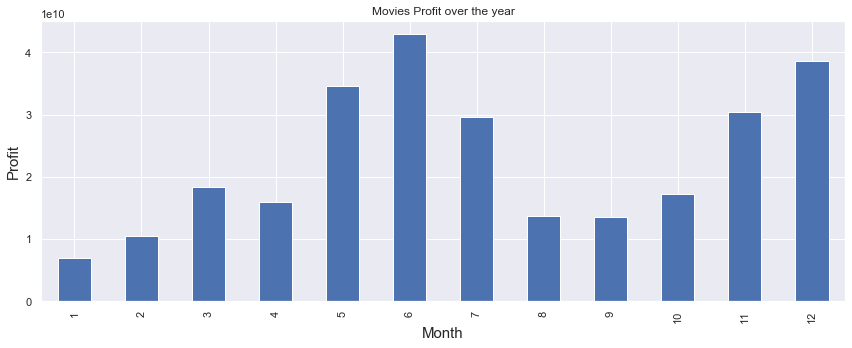

In [441]:
fig, (ax1) = plt.subplots(1, figsize=(12,5))
h= df_clean_figures['release_date'].dt.month 
df_clean_figures.groupby(h)['profit'].sum().plot(kind='bar', ax=ax1, title='Movies Profit over the year')
ax1.set_xlabel('Month', size=15)
ax1.set_ylabel('Profit', size=15)
plt.tight_layout();

### Feedback
#### As per the graph, it demonstrates that the highest profit across five months a year and they could be the months where a lot of people have a plenty of time to go to the cinemas. So, it can be taken into consideration to release a movie in such times to gurantee a good turnout

## Q5: Which directors do whose movies make the highest and least profit?

In [413]:
#the directors whose movies made the highest profit
df_clean_figures.groupby('director')['profit'].sum().sort_values(ascending= False).iloc[:10, ]

director
Steven Spielberg     7467063772
Peter Jackson        5197244659
James Cameron        5081994863
Michael Bay          3557208171
David Yates          3379295625
Christopher Nolan    3162548502
Chris Columbus       3116631503
George Lucas         2955996893
Robert Zemeckis      2846690869
J.J. Abrams          2839169916
Name: profit, dtype: int64

In [412]:
#the directors whose movies made the least profit
df_clean_figures.groupby('director')['profit'].sum().sort_values(ascending= True).iloc[:10, ]

director
David Bowers|Sam Fell                -84540684
Walter Hill|Jack Sholder             -75171919
Andrei Konchalovsky                  -74885029
Joby Harold                          -71626175
Rod Lurie                            -70346150
Simon Wells                          -67278066
Oliver Hirschbiegel|James McTeigue   -64928486
Lawrence Kasanoff                    -64926294
John Bruno                           -60989310
Steven Zaillian                      -58846202
Name: profit, dtype: int64

## Q6: Do the directors that use the highest budgets get the highest revenue in return?

C:\Users\Ahmed Nasser\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


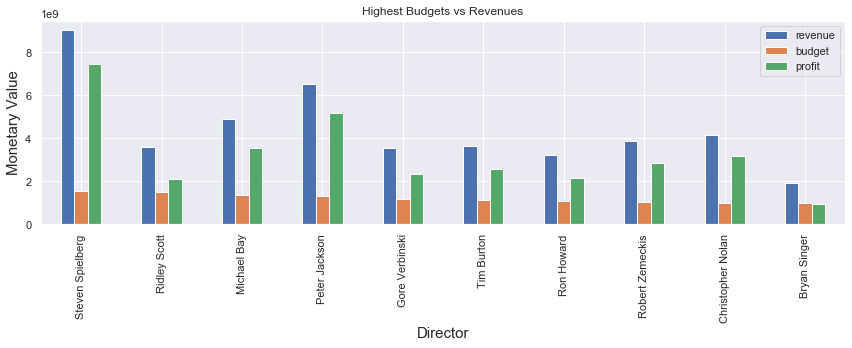

In [427]:
fig, (ax1) = plt.subplots(1, figsize=(12,5))

df_clean_figures.groupby('director')['revenue','budget', 'profit'].sum().sort_values(ascending= False, by='budget').iloc[:10,:].plot(kind='bar',ax=ax1, title='Highest Budgets vs Revenues')
ax1.set_xlabel('Director', size=15)
ax1.set_ylabel('Monetary Value', size=15)
plt.tight_layout();



### Feedback
#### It seems that using high budgets would be a favor as it gets a high revenue in return as mentioned

## Q7: Which production companies making the highest revenue and profit?

In [439]:
df_clean_figures.groupby('production_companies')['profit'].sum().sort_values(ascending= False).iloc[:10, ]

production_companies
Walt Disney Pictures|Pixar Animation Studios                                                                  5791558520
Paramount Pictures                                                                                            5126632638
DreamWorks Animation                                                                                          4689741096
Marvel Studios                                                                                                4657808966
Blue Sky Studios|Twentieth Century Fox Animation                                                              3305820202
Columbia Pictures                                                                                             3232619748
Universal Pictures|Illumination Entertainment                                                                 2851800871
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment    2544505847
Walt Disney

In [440]:
df_clean_figures.groupby('production_companies')['revenue'].sum().sort_values(ascending= False).iloc[:10, ]

production_companies
Walt Disney Pictures|Pixar Animation Studios          7648558520
Paramount Pictures                                    7040937553
DreamWorks Animation                                  6676741096
Marvel Studios                                        6027808966
Columbia Pictures                                     4621239748
Blue Sky Studios|Twentieth Century Fox Animation      3938820202
Walt Disney Pictures|Walt Disney Animation Studios    3498726837
Universal Pictures|Illumination Entertainment         3203800871
Universal Pictures                                    3139395421
Eon Productions                                       3126131033
Name: revenue, dtype: int64

### An overview of Data Assessing and wrangling steps

In beginning, after assessing the data, there have been 10866 rows and 21 columns of various data and dtypes. Besides, there are null values in 9 columns, one duplicate row and the monetary-related columns have very low values which don't make any sense. Moreover, there are some other columns of only text content with no benefit to working on and some other columns to be transformed into a specific dtype to use. 

So, a first copy has been made to perform such operations starting from dropping the null values, unneeded columns and transforming some columns. 

Then, a second copy has been made to perform extra operations such as dropping all the null values and all the budget and revenue columns of zero values. Then, after some research about the movies with a very low budget and revenue values, they have been dropped as they represent fake data. Over and above, a profit column has been created by subtracting the revenue and budget columns to find some trends regarding profitability.


<a id='conclusions'></a>
## Conclusions

Speaking of the data analysis, here are the findings:

Popularity ranges from 0  to 32 approximately.
Votes range from 1.5 to 9.2 (on a scale-out of 10), with an average of 5.97.
The budget ranges from approx. 0 - 425 million (average 14.6 million) in USD dollars.
Revenue (USD) ranges from approx. 0 - 2.78 billion (average 39.8 million) in USD dollars.
Release years range from 1960 - 2015.

-The movie's release increases with time clearly where it was below 100 movies in the first three decades. Then, it broke the 100s barrier from the mid-eighties and took less time to reach the highest number in the late nineties. Then, it a dramatic upsurge in the 2000s especially the last years.

-These months "September, October, December, and January" have a high number of movies released compared to the others across the year.

-There is a slight positive correlation between the popularity and both vote average and vote count.

-The most recent years' movies have the highest vote count while the older years' movies have the highest vote average.

-The highest vote average movies have very low vote count while the highest vote count movies have fine to considerable vote average.

-There is a positive correlation between vote average and vote count to an average score of 8, then there isn't after that.

-Movies runtime average changes drastically over time from nearly 120 minutes to less than 100 minutes.

-Woody Allen has more than 40 movies on the list and Clint Eastwood has more than 30 movies.

-9  out of the top 10 popular movies are last decades movies.

-Drama, comedy, and thriller are the top three genres across the dataset with nearly 40% of the total genres.

-Robert De Niro and Samuel L. Jackson have starred in more than 70 movies on the list.

-Universal Pictures, Warner Bros, Paramount Pictures have the highest number of produced movies over 400 movies.

-Most of the top ten of the biggest money-losing and most profitable movies are the last two decades' movies while the rest are the late nineties.

-Inflation has a very obvious impact, especially when the profit of the older decades' movies got translated into the 2010 USD dollar.

-Budget, revenue and profit have been increased dramatically with time. Besides, there is a considerable profit over the last decades in comparison with older ones.

-May, June, July, November, and December witnessed the movies with the highest profit.

-Steven Spielberg, Peter Jackson, and James Cameron are top directors whose movies make a lot of profit of more than 5 billion dollars.

-Directors who spent a lot of money "highest movie budgets" got a very high revenue in return.

-Walt Disney Pictures, Pixar Animation Studios, and Paramount Pictures made the highest profit and revenue over 7 and 5 billion dollars respectively.